Deserve to Review：
- 2.5

# 2. Preliminaries

## 2.1 Data Manipulation

### 2.1.1 Getting Start

In [1]:
import torch

In [3]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
x.shape

torch.Size([12])

In [18]:
x.numel()

12

In [15]:
X = x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [14]:
X.shape

torch.Size([3, 4])

In [17]:
X.numel()

12

In [21]:
torch.randn(3,4)

tensor([[-1.6681,  0.4901, -0.0211, -0.2966],
        [-0.6331, -0.9672,  1.8871,  1.8360],
        [-0.7827,  0.0938, -0.6019,  0.5968]])

In [22]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 2.1.2 Operations

In [23]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [25]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [26]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [27]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [28]:
Y

tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])

In [29]:
torch.cat((X, Y), dim=0).shape, torch.cat((X, Y), dim=1).shape

(torch.Size([6, 4]), torch.Size([3, 8]))

使用torch.cat((A,B),dim)时，除拼接维数dim数值可不同外其余维数数值需相同，方能对齐。

In [30]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [31]:
X.sum()

tensor(66.)

### 2.1.3 Broadcasting Mechanism

[知乎np广播机制解读](https://zhuanlan.zhihu.com/p/60365398)  

[另外一个resource](https://www.runoob.com/numpy/numpy-broadcast.html)

[官方broadcasting解释](https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [32]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [33]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 2.1.4 Indicing and Slicing

In [34]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [83]:
X[-1],X[1:3,3]

(tensor([28., 30., 32., 34.]), tensor([25., 34.]))

In [39]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

### 2.1.5 Saving Memory

十分有趣的tips

In [41]:
before = id(Y)
Y = Y + X
id(Y) == before 
# 即这么写 会先在内存空间寻找一个位置存储Y+X 再用指针去指 但换个方式 就可以解决这个问题了

False

如果在后续计算中没有重复使用X， 我们也可以使用X[:] = X + Y或X += Y来减少操作的内存开销。

In [42]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140492726780528
id(Z): 140492726780528


In [44]:
before = id(X)
X += Y
id(X) == before

True

### 2.1.6 Conversion to Other Python Objects

In [45]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B) # pytorch基于numpy-array结构

(numpy.ndarray, torch.Tensor)

In [46]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [49]:
X.item()

ValueError: only one element tensors can be converted to Python scalars

### 2.1.7 Summary

深度学习存储和操作数据的主要接口是张量（ 𝑛 维数组）。它提供了各种功能，包括基本数学运算、广播、索引、切片、内存节省和转换其他Python对象。

### 2.1.8 Exercises

#### E.1.

In [50]:
X == Y

tensor([[ True, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [51]:
X > Y

tensor([[False,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

In [52]:
X < Y

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

#### E.2.

In [55]:
I = torch.arange(60).reshape([3,4,5])
I

tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]])

In [71]:
J = torch.arange(10,30).reshape([1,4,5])
K = J.reshape([4,5])
J, K #J K 维数不同

(tensor([[[10, 11, 12, 13, 14],
          [15, 16, 17, 18, 19],
          [20, 21, 22, 23, 24],
          [25, 26, 27, 28, 29]]]),
 tensor([[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]))

In [77]:
I + J, I + K

(tensor([[[10, 12, 14, 16, 18],
          [20, 22, 24, 26, 28],
          [30, 32, 34, 36, 38],
          [40, 42, 44, 46, 48]],
 
         [[30, 32, 34, 36, 38],
          [40, 42, 44, 46, 48],
          [50, 52, 54, 56, 58],
          [60, 62, 64, 66, 68]],
 
         [[50, 52, 54, 56, 58],
          [60, 62, 64, 66, 68],
          [70, 72, 74, 76, 78],
          [80, 82, 84, 86, 88]]]),
 tensor([[[10, 12, 14, 16, 18],
          [20, 22, 24, 26, 28],
          [30, 32, 34, 36, 38],
          [40, 42, 44, 46, 48]],
 
         [[30, 32, 34, 36, 38],
          [40, 42, 44, 46, 48],
          [50, 52, 54, 56, 58],
          [60, 62, 64, 66, 68]],
 
         [[50, 52, 54, 56, 58],
          [60, 62, 64, 66, 68],
          [70, 72, 74, 76, 78],
          [80, 82, 84, 86, 88]]]))

In [79]:
I * J

tensor([[[   0,   11,   24,   39,   56],
         [  75,   96,  119,  144,  171],
         [ 200,  231,  264,  299,  336],
         [ 375,  416,  459,  504,  551]],

        [[ 200,  231,  264,  299,  336],
         [ 375,  416,  459,  504,  551],
         [ 600,  651,  704,  759,  816],
         [ 875,  936,  999, 1064, 1131]],

        [[ 400,  451,  504,  559,  616],
         [ 675,  736,  799,  864,  931],
         [1000, 1071, 1144, 1219, 1296],
         [1375, 1456, 1539, 1624, 1711]]])

**要想可以运算 维数少的如shape=[2,4]要和维数多的如shape=[2,3,4,2,4]最后的[2,4]相同 才可以采用广播机制**

## 2.2 Data Preprocessing

### 2.2.1. Reading the Dataset

In [29]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [30]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


### 2.2.2. Handling Missing Data

In [35]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs,outputs

(   NumRooms Alley
 0       NaN  Pave
 1       2.0   NaN
 2       4.0   NaN
 3       NaN   NaN,
 0    127500
 1    106000
 2    178100
 3    140000
 Name: Price, dtype: int64)

In [37]:
inputs = inputs.fillna(inputs.mean())
inputs

/var/folders/kf/sp9yrhn14zx4hs1t5zrns5v40000gn/T/ipykernel_13793/3022856649.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inputs = inputs.fillna(inputs.mean())


,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [39]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


### 2.2.3. Conversion to the Tensor Format

In [45]:
inputs.values, outputs.values # 注意 这个.values输出的是numpy array

(array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]]),
 array([127500, 106000, 178100, 140000]))

In [41]:
import torch
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

### 2.2.4. Summary

pandas软件包是Python中常用的数据分析工具中，pandas可以与张量兼容。

用pandas处理缺失的数据时，我们可根据情况选择用插值法和删除法。

### 2.2.5. Exercises

#### E.1.

In [48]:
df = data
data.isna().sum()

NumRooms    2
Alley       3
Price       0
dtype: int64

In [49]:
del df['Alley']
df

,NumRooms,Price
0,NaN,127500
1,2.0,106000
2,4.0,178100
3,NaN,140000


#### E.2.

In [59]:
df = df.fillna(df.mean())
df

,NumRooms,Price
0,3.0,127500
1,2.0,106000
2,4.0,178100
3,3.0,140000


In [64]:
X1,y1 = torch.tensor(df.iloc[:,0].values),torch.tensor(df.iloc[:,1].values)
X1,y1

(tensor([3., 2., 4., 3.], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

## 2.3 Linear Algerbra

### 2.3.1. Scalars

In [315]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x*y, x/y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2. Vectors

In [316]:
x = torch.arange(5)
x

tensor([0, 1, 2, 3, 4])

In [317]:
x[3]

tensor(3)

Length, Dimension and Shape

In [318]:
len(x)

5

In [319]:
x.shape

torch.Size([5])

### 2.3.3. Matrices

In [320]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

Transpose

In [321]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

Symmetric Matrix

In [322]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [323]:
B.T == B

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4. Tensors

In [324]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5. Basic Properties of Tensor Arithmetic

In [325]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

Hadamard product A ⊙ B

In [326]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [327]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 2.3.6. Reduction



降维

In [328]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [329]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [330]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [331]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [332]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape # 可以看出 tensor axis是从右往左的

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [333]:
A.sum(axis=[0, 1])  # Same as A.sum()

tensor(190.)

In [334]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [335]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

#### 2.3.6.1. Non-Reduction Sum

In [336]:
sum_A = A.sum(axis=1)
sum_A, sum_A.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [337]:
A / sum_A

RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1

In [338]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape, A.shape

(tensor([[ 6.],
         [22.],
         [38.],
         [54.],
         [70.]]),
 torch.Size([5, 1]),
 torch.Size([5, 4]))

In [339]:
A / sum_A # 此时就是广播机制的运用

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [340]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [341]:
A.cumsum(axis=0) # cumulative sum

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

### 2.3.7. Dot Products

Vector dot products:  
$x^Ty=\sum_{i=1}^{d} x_iy_i$

In [342]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [343]:
torch.sum(x*y)

tensor(6.)

### 2.3.8. Matrix-Vector Products

In [344]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### 2.3.9. Matrix-Matrix Multiplication

In [345]:
B = torch.ones(4, 3)
A,B,torch.mm(A, B)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

### 2.3.10. Norms

线性代数中最有用的一些运算符是范数（norm）。 非正式地说，一个向量的范数告诉我们一个向量有多大。 这里考虑的大小（size）概念不涉及维度，而是分量的大小。

在线性代数中，向量范数是将向量映射到标量的函数 𝑓 。 给定任意向量 𝐱 ，向量范数要满足一些属性。 第一个性质是：如果我们按常数因子 𝛼 缩放向量的所有元素， 其范数也会按相同常数因子的绝对值缩放
- 𝑓(𝛼𝐱)=|𝛼|𝑓(𝐱)  

第二个性质是我们熟悉的三角不等式:
- 𝑓(𝐱+𝐲)≤𝑓(𝐱)+𝑓(𝐲)  
  
第三个性质简单地说范数必须是非负的:  
- 𝑓(𝐱)≥0  

这是有道理的。因为在大多数情况下，任何东西的最小的大小是0。 最后一个性质要求范数最小为0，当且仅当向量全由0组成。
- ∀𝑖,[𝐱]𝑖=0⇔𝑓(𝐱)=0  

L1 norm: $||X||_1=\sum_{i=1}^n|x_i|$  
L2 norm: $||X||_2=\sqrt{\sum_{i=1}^nx_i^2}$



In [352]:
u = torch.tensor([3.0, -4.0])
torch.norm(u,dim=0)

tensor(5.)

In [364]:
U = torch.tensor([[3.0,5],[2,4]])
U.norm(dim=1)

tensor([5.8310, 4.4721])

In [140]:
torch.abs(u).sum()

tensor(7.)

In [142]:
torch.ones((4, 9)), torch.norm(torch.ones((4, 9)))

(tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 tensor(6.))

Lp norm: $||X||_p=(\sum_{i=1}^n|x_i|^p)^{\frac{1}{p}}$  
Frobenius norm: $||X||_F=\sqrt{\sum_{i=1}^m\sum_{i=1}^nx_{ij}^2}$

#### 2.3.10.1. Norms and Objectives

Oftentimes, the objectives, perhaps the most important components of deep learning algorithms (besides the data), are expressed as norms.

### 2.3.11. More on Linear Algebra


机器学习的整个子领域都侧重于使用矩阵分解及其向高阶张量的泛化，来发现数据集中的结构并解决预测问题。 我们相信，一旦你开始动手尝试并在真实数据集上应用了有效的机器学习模型，你会更倾向于学习更多数学。

### 2.3.12. Summary

标量、向量、矩阵和张量是线性代数中的基本数学对象。

向量泛化自标量，矩阵泛化自向量。

标量、向量、矩阵和张量分别具有零、一、二和任意数量的轴。

一个张量可以通过sum和mean沿指定的轴降低维度。

两个矩阵的按元素乘法被称为他们的Hadamard积。它与矩阵乘法不同。

在深度学习中，我们经常使用范数，如 𝐿1 范数、 𝐿2 范数和Frobenius范数。

我们可以对标量、向量、矩阵和张量执行各种操作。

### 2.3.13. Exercises

#### E.4.

In [127]:
len(X), X.shape, X

(2,
 torch.Size([2, 3, 4]),
 tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]))

#### E.6.

In [135]:
A.sum(axis = 1), A, A.shape, A.sum(axis = 1).shape

(tensor([ 6., 22., 38., 54., 70.]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 torch.Size([5, 4]),
 torch.Size([5]))

In [136]:
A/A.sum(axis = 1)

RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1

#### E.7.

In [138]:
torch.arange(24).reshape(2,3,4),torch.arange(24).reshape(2,3,4).sum(axis=0),torch.arange(24).reshape(2,3,4).sum(axis=1),torch.arange(24).reshape(2,3,4).sum(axis=2)

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]),
 tensor([[12, 15, 18, 21],
         [48, 51, 54, 57]]),
 tensor([[ 6, 22, 38],
         [54, 70, 86]]))

也就是说 这种加和 一定会降1维 输入的axis会被加和降维消去  
理解哪个被消去，就加和哪个就行  
所以题目：考虑一个具有形状 (2,3,4) 的张量，在轴0、1、2上的求和输出是什么形状?  
结果为(3,4),(2,4),(2,3)

## 2.4 Calculus

Optimization and Generalization

### 2.4.1. Derivatives and Differentiation

导数和微分

In [116]:
import numpy as np
import torch
from tqdm import tqdm
def f(x):
    return 3 * x ** 2 - 4 * x

In [117]:
def numerical_lim(f, x, h):
    return(f(x + h) - f(x))/h
h = 0.1 
for i in tqdm(range(5)):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

100%|██████████| 5/5 [00:00<00:00, 35246.25it/s]

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


这个可视化部分 值得学习 人家是怎么封装的

In [118]:
from matplotlib import pyplot as plt


In [119]:
# 这个我用不上 不是一个shell 我用的是vscode 人用的是IPython
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    display.set_matplotlib_formats('svg')

In [120]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    # use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

In [121]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [122]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear', #scale 也能设置 我才发现 牛啊
         # scale: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

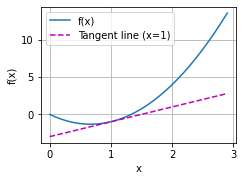

In [123]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)']) 
# 这编程水平 直接用list导入想要画的函数

In [124]:
from matplotlib import pyplot as plt


In [125]:
import sys
sys.path.append('/Users/albert/PycharmProjects/MLnNew/')
# 这种方法 可以导入不同路径的package

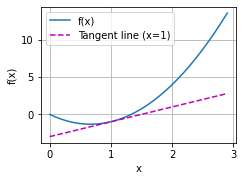

In [126]:
from visualize.lineplot import plot
import numpy as np
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### 2.4.2. Partial Derivatives

$\partial$ partial  
$\Delta$  
$\nabla$ nabla

### 2.4.3. Gradients

$\nabla_xf(X)=[\frac{\partial f(X)}{\partial x_1},\frac{\partial f(X)}{\partial x_2},...\frac{\partial f(X)}{\partial x_n}]^T$

### 2.4.4. Chain Rule

$\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x}$

### 2.4.5. Summary

微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。

导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率。

梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。

链式法则使我们能够微分复合函数。

### 2.4.6 Exercise

#### E.1.

$3x^2+\frac{1}{x^2}$

/var/folders/kf/sp9yrhn14zx4hs1t5zrns5v40000gn/T/ipykernel_21204/1444329138.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return x ** 3 - 1/x


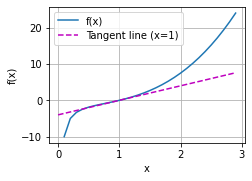

In [140]:
from visualize.lineplot import plot
import numpy as np
def f(x):
    return x ** 3 - 1/x


x = np.arange(0, 3, 0.1) # 到现在还是搞不懂 
plot(x, [f(x), 4*x - 4], 'x', 'f(x)', 
    legend=['f(x)', 'Tangent line (x=1)'])

In [138]:
np.arange(0, 3, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9])

#### E.2.

$\nabla f(\mathbf x) = [6x_1,5e^{x_2}]$ 

#### E.3.

$\nabla f(\mathbf x) = \frac{\partial ||\mathbf x||_2}{\partial\mathbf x} = \frac{\mathbf x}{||\mathbf x||_2}$

#### E.4.

When $ u = f(x,y,z)$ and $x=x(a,b),y=y(a,b),z=z(a,b)$:  
$\frac{du}{da}=\frac{du}{dx}\frac{dx}{da}+\frac{du}{dy}\frac{dy}{da}+\frac{du}{dz}\frac{dz}{da}$  
$\frac{du}{db}=\frac{du}{dx}\frac{dx}{db}+\frac{du}{dy}\frac{dy}{db}+\frac{du}{dz}\frac{dz}{db}$ 


## 2.5. Automatic Differentiation

automatic differentiation  
[computational graph](https://www.bilibili.com/video/BV1FT4y1E74V?p=13)  
backpropagate  
[附一个很好的backpropagate的解释 很牛 一定看下](https://pjskd1.github.io/2019/03/28/PyTorch%E8%87%AA%E5%8A%A8%E6%B1%82%E5%AF%BCAutograd%E4%B8%AD%E7%9A%84backward/)(暂时没看完)  
[此外这个也是不错的解释 说清楚了autograd的内涵](https://zhuanlan.zhihu.com/p/29904755)  
注意：若是关于graph leaves求导的结果变量是一个标量，那么gradient默认为None，或者指定为“torch.Tensor([1.0])”
若是关于graph leaves求导的结果变量是一个向量，那么gradient是不能缺省的，要是和该向量同维度的tensor


### 2.5.1. A Simple Example

In [1]:
import torch

In [2]:
x = torch.arange(4.0)
x


tensor([0., 1., 2., 3.])

In [3]:
print(x.grad)

None


In [4]:
x.requires_grad_(True)
print(x.grad)
x.grad

None


In [5]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [6]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [7]:
x.grad == 4 * x

tensor([True, True, True, True])

In [8]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
print(y)
y.backward()
x.grad

tensor(6., grad_fn=<SumBackward0>)


tensor([1., 1., 1., 1.])

### 2.5.2. Backward for Non-Scalar Variables

In [9]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 在我们的例子中，我们只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
print(y)
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)


tensor([0., 2., 4., 6.])

$
\mathbf x = [x_0,x_1,x_2,x_3] =[0,1,2,3] \\
y = [x_0^2,x_1^2,x_2^2,x_3^2]\\
y.sum()=x_0^2+x_1^2+x_2^2+x_3^2\\
\nabla y.sum = 2[x_0,x_1,x_2,x_3] = [0, 2, 4, 6]
$





#### Test

In [219]:
y.sum()

tensor(14., grad_fn=<SumBackward0>)

In [179]:
a = torch.tensor([[1,2],[2,3]])
a * a

tensor([[1, 4],
        [4, 9]])

In [226]:
torch.dot(x,x)

tensor(14., grad_fn=<DotBackward0>)

In [274]:
[75, 108]

[75, 108]

In [269]:
import time 

a = torch.randn(100000)
b = torch.randn(100000)

tic = time.time()
c = torch.dot(a,b)
toc = time.time()

print(f'Verctorized version {1000*(toc-tic):.5f}ms')


Verctorized version 0.13494ms


In [180]:
torch.mm(a,a)

tensor([[ 5,  8],
        [ 8, 13]])

In [198]:
np.zeros((3,))

array([0., 0., 0.])

In [200]:
np.zeros((3))

array([0., 0., 0.])

In [215]:
A = np.zeros((2,3,4))
B = np.ones((1,4))


In [216]:
A+B

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

### 2.5.3. Detaching Computation

In [284]:
x.grad.zero_()
y = x * x
y.backward(torch.ones(4))
x.grad

tensor([0., 2., 4., 6.])

In [285]:
x.shape

torch.Size([4])

In [286]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [288]:
u # 那确实 当成一个常数乘了

tensor([0., 1., 4., 9.])

In [289]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 2.5.4. Computing the Gradient of Python Control Flow

In [365]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [366]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [367]:
a.grad == d / a

tensor(True)

### 2.5.5. Summary

深度学习框架可以自动计算导数：我们首先将梯度附加到想要对其计算偏导数的变量上。然后我们记录目标值的计算，执行它的反向传播函数，并访问得到的梯度。

### 2.5.6. Exercises

#### E.1.

多进行一轮$d$

#### E.2.

如果不清零 grad会累积

In [371]:
x

tensor([0., 1., 2., 3.])

In [11]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad


tensor([0., 1., 4., 9.])

In [14]:
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad

tensor([ 0.,  2.,  8., 18.])

#### E.3.

In [18]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [47]:
a = torch.randn(size=(3,4), requires_grad=True)
d = f(a)
d.backward(torch.ones((3,4))) #或是
a.grad

tensor([[512., 512., 512., 512.],
        [512., 512., 512., 512.],
        [512., 512., 512., 512.]])

In [48]:
a.grad.zero_()
print(a.grad)
d = f(a)
d.sum().backward()
a.grad

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


tensor([[512., 512., 512., 512.],
        [512., 512., 512., 512.],
        [512., 512., 512., 512.]])

#### E.4.

#### E.5.

In [78]:
import numpy as np
import matplotlib.pyplot as plt


In [103]:
x = torch.arange(-10,10,0.001,requires_grad=True)
y = torch.sin(x)
y.sum().backward()
x.grad

tensor([-0.8391, -0.8396, -0.8402,  ..., -0.8407, -0.8402, -0.8396])

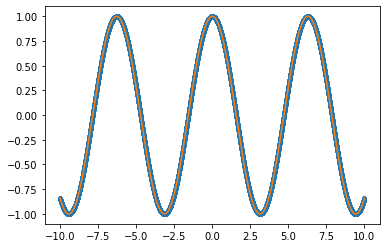

In [131]:
plt.plot(x.detach(),x.grad,'.')
plt.plot(x.detach(),x.detach().cos(),'-')

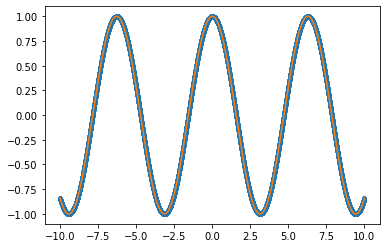

In [132]:
plt.plot(x.data,x.grad,'.')
plt.plot(x.data,x.data.cos(),'-')

In [134]:
x.grad,x.data

(tensor([-0.8391, -0.8396, -0.8402,  ..., -0.8407, -0.8402, -0.8396]),
 tensor([-10.0000,  -9.9990,  -9.9980,  ...,   9.9970,   9.9980,   9.9990]))

## 2.6. Probability

### 2.6.1. Basic Probability Theory

In [160]:
import torch
from torch.distributions import multinomial #多项式分布 multinomial
import matplotlib.pyplot as plt

In [157]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

In [158]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 3., 0., 3., 2., 1.])

In [159]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1830, 0.1530, 0.1500, 0.1800, 0.1600, 0.1740])

In [171]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True) # 除以累积总数dim=1先求各次samle的总实验次数


[参照这个画线](https://www.osgeo.cn/matplotlib/gallery/pyplots/axline.html)

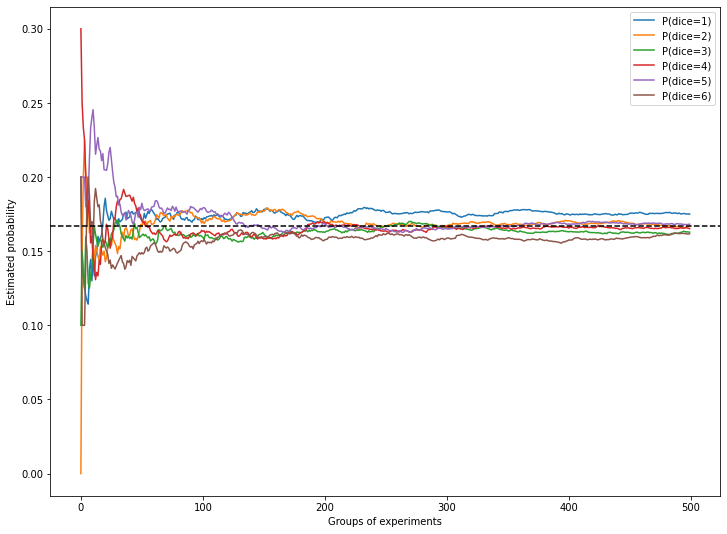

In [207]:
plt.rcParams['figure.figsize'] = (12,9)
for i in range(6):
    plt.plot(estimates[:,i].numpy(),label =f'P(dice={i+1})')
plt.axline((0,0.16667),slope=0, color = 'black', linestyle = 'dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend()


#### 2.6.1.1. Axioms of Probability Theory

sample space/ outcome space

#### 2.6.1.2. Random Variables

### 2.6.2. Dealing with Multiple Random Variables

label

#### 2.6.2.1. Joint Probability

#### 2.6.2.2. Conditional Probability

#### 2.6.2.3. Bayes’ theorem

multiplication rule: $P(A,B)=P(A|B)P(B)\\
P(A,B)=P(B|A)P(A)\\
\rightarrow P(A|B)= \cfrac{P(B|A)P(A)}{P(B)}$

#### 2.6.2.4. Marginalization

We can see that the probability of  𝐵  amounts to accounting for all possible choices of  𝐴  and aggregating the joint probabilities over all of them:  
    sum rule: $P(B)=\sum_ AP(A,B)$  
which is also known as the sum rule. The probability or distribution as a result of marginalization is called a *marginal probability* or a *marginal distribution.*

#### 2.6.2.5. Independence

$\begin{align*}
dependence:& A\perp \!\!\! \perp B  \rightarrow  P(A|B)=P(A) \\
independence:& \not \! \perp \!\!\! \perp \\ 
conditionally\ independent: &P(A,B|C) = P(A|C)P(B|C) \leftrightarrow A \perp \!\!\! \perp B | C \end{align*}$


#### 2.6.2.6. Application

HIV test

### 2.6.3. Expectation and Variance

$
E[X] = \sum_{x} x P(X = x). \\
E_{x \sim P}[f(x)] = \sum_x f(x) P(x).\\
\mathrm{Var}[X] = E\left[(X - E[X])^2\right] =
E[X^2] - E[X]^2.\\
\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].
$

### 2.6.4. Summary

我们可以从概率分布中采样。

我们可以使用联合分布、条件分布、Bayes定理、边缘化和独立性假设来分析多个随机变量。

期望和方差为概率分布的关键特征的概括提供了实用的度量形式。

### 2.6.5 Exercise

#### E.1.

In [208]:
import torch 
from torch.distributions import multinomial

In [212]:
prob = torch.tensor([1,0,0.99,0.01])/2

In [233]:
counts = multinomial.Multinomial(10, prob).sample((500,))
counts

tensor([[6., 0., 4., 0.],
        [3., 0., 7., 0.],
        [5., 0., 5., 0.],
        ...,
        [4., 0., 6., 0.],
        [6., 0., 3., 1.],
        [7., 0., 3., 0.]])

In [234]:
cum_counts= counts.cumsum(dim = 0)
cum_counts

tensor([[   6.,    0.,    4.,    0.],
        [   9.,    0.,   11.,    0.],
        [  14.,    0.,   16.,    0.],
        ...,
        [2486.,    0., 2465.,   29.],
        [2492.,    0., 2468.,   30.],
        [2499.,    0., 2471.,   30.]])

In [240]:
estimates = cum_counts / cum_counts.sum(dim = 1,keepdim = True)
estimates

tensor([[0.6000, 0.0000, 0.4000, 0.0000],
        [0.4500, 0.0000, 0.5500, 0.0000],
        [0.4667, 0.0000, 0.5333, 0.0000],
        ...,
        [0.4992, 0.0000, 0.4950, 0.0058],
        [0.4994, 0.0000, 0.4946, 0.0060],
        [0.4998, 0.0000, 0.4942, 0.0060]])

#### E.2.

[Venn Diagram](https://en.wikipedia.org/wiki/Venn_diagram)

#### E.3.

[Markov Chain](https://en.wikipedia.org/wiki/Markov_chain)

感觉跟条件概率链式法则有关 A -> B ->C  
P(A,B,C) = P(C|A,B)P(A,B) 由于C和A无关P(A,B,C) = P(C|A,B)P(A,B) = P(C|B)P(B|A)

#### E.4.

因为第二个测试有不同的特性 可以避免一些第一次测试的漏洞

## 2.7. Documentation


### 2.7.1. Finding All the Functions and Classes in a Module


In [245]:
dir(torch.distributions)

['AbsTransform',
 'AffineTransform',
 'Bernoulli',
 'Beta',
 'Binomial',
 'CatTransform',
 'Categorical',
 'Cauchy',
 'Chi2',
 'ComposeTransform',
 'ContinuousBernoulli',
 'CorrCholeskyTransform',
 'Dirichlet',
 'Distribution',
 'ExpTransform',
 'Exponential',
 'ExponentialFamily',
 'FisherSnedecor',
 'Gamma',
 'Geometric',
 'Gumbel',
 'HalfCauchy',
 'HalfNormal',
 'Independent',
 'IndependentTransform',
 'Kumaraswamy',
 'LKJCholesky',
 'Laplace',
 'LogNormal',
 'LogisticNormal',
 'LowRankMultivariateNormal',
 'LowerCholeskyTransform',
 'MixtureSameFamily',
 'Multinomial',
 'MultivariateNormal',
 'NegativeBinomial',
 'Normal',
 'OneHotCategorical',
 'OneHotCategoricalStraightThrough',
 'Pareto',
 'Poisson',
 'PowerTransform',
 'RelaxedBernoulli',
 'RelaxedOneHotCategorical',
 'ReshapeTransform',
 'SigmoidTransform',
 'SoftmaxTransform',
 'StackTransform',
 'StickBreakingTransform',
 'StudentT',
 'TanhTransform',
 'Transform',
 'TransformedDistribution',
 'Uniform',
 'VonMises',
 'Weibu

### 2.7.2. Finding the Usage of Specific Functions and Classes

In [246]:
help(torch.ones)

Help on built-in function ones:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the cur

### 2.7.3. Summary

官方文档提供了本书之外的大量描述和示例。

我们可以通过调用dir和help函数或在Jupyter记事本中使用?和??查看API的用法文档。